In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ディレクトリを変更
%cd 作業ディレクトリ

## OIDのDatasetは使わない。

In [ ]:
!pip install fiftyone

In [ ]:
# OID Datasets Download
# https://storage.googleapis.com/openimages/web/visualizer/index.html?type=detection&set=train&c=%2Fm%2F0dzct

import fiftyone

dataset = fiftyone.zoo.load_zoo_dataset(
              "open-images-v6",
              split="validation",
              label_types=["detections"],
              classes=["Human face"],
              max_samples=3000,
          )

In [ ]:
!ls /root/fiftyone/open-images-v6/validation

In [ ]:
!ls

 data.yaml				 README.dataset.txt    train
 face_detection.ipynb			 README.roboflow.txt   validation
'Face Detection.v2i.yolov5pytorch.zip'	 test


## robflowのdatasetをdownloadしてきた。

In [ ]:
%cd NEW_datasets
!unzip 'Mask Wearing.v1-416x416-black-padding.yolov5pytorch.zip'
%cd ../

In [ ]:
from glob import glob

#データの取得 
train_imgs = sorted(glob('datasets/train/images/*.jpg'))
train_labels = sorted(glob('datasets/train/labels/*.txt'))

validation_imgs = sorted(glob('datasets/test/images/*.jpg'))
validation_labels = sorted(glob('datasets/test/labels/*.txt'))


print(len(train_imgs))
print(len(train_labels))
print(len(validation_imgs))
print(len(validation_labels))

105
105
15
15


## yolov5を使用する

In [ ]:
# !git clone https://github.com/ultralytics/yolov5 # clone repo
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)
%cd yolov5

In [4]:
import torch
from IPython.display import Image, clear_output

robflowのdatasetを解凍した際に中に入っているdata.ymlをyolov5/data/に移動させる。

In [ ]:
!python train.py --img 416 --batch 16 --epochs 300 --data data/data.yaml --cfg yolov5s.yaml --weights yolov5s.pt --save-period 100

In [ ]:
!python detect.py --source ../test_img/test.jpg --weights runs/train/exp0/weights/best.pt --img 416

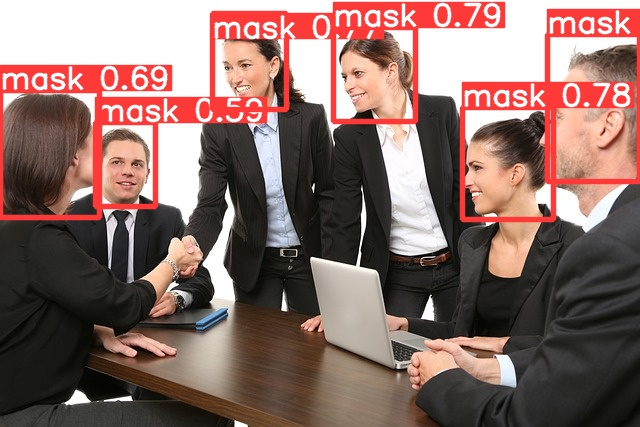

In [ ]:
Image(filename='runs/detect/exp0/test.jpg', width=416)